In [18]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/sinha/OneDrive/Desktop/Learning/Analysis/Accelya/bsp-anon')
from sklearn import preprocessing
import re
from scipy.stats import zscore
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,BayesianRidge
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,VotingClassifier
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn import svm

from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline


In [4]:
#Read clean file
df1 = pd.read_csv('Clean_File.csv')
df1.columns

Index(['bks24_pnrr', 'airlinecode', 'curcode', 'bks24_dais', 'bks24_todc',
       'bki63_orac', 'bki63_dstc', 'bki63_carr', 'bki63_ftda', 'bki63_cabi',
       'bki63_rbkd', 'bks39_rdii', 'bki63_segi', 'bki63_stpo', 'bks24_rfic',
       'n_tktt', 'n_segments', 'label', 'label_amount', 'Amount(USD)',
       'booking_travel_days_diff', 'departure_time', 'journey_strng',
       'departure_hour', 'departure_type'],
      dtype='object')

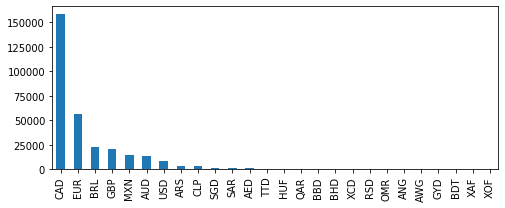

In [6]:
#plot to check transaction currency countwise 

df1['curcode'].value_counts().plot(kind='bar', figsize = (8,3))

<function matplotlib.pyplot.show(*args, **kw)>

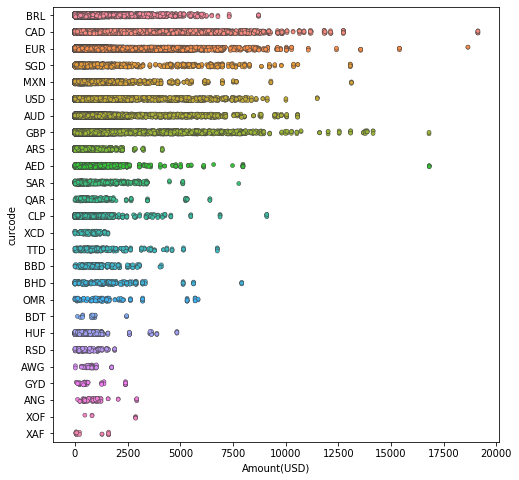

In [8]:
#stripplot to check distribution of cuurency

plt.figure(figsize=(8, 8))
ax3 = sns.stripplot(y='curcode', x='Amount(USD)', size = 4, data=df1, linewidth = 0.5)
plt.show

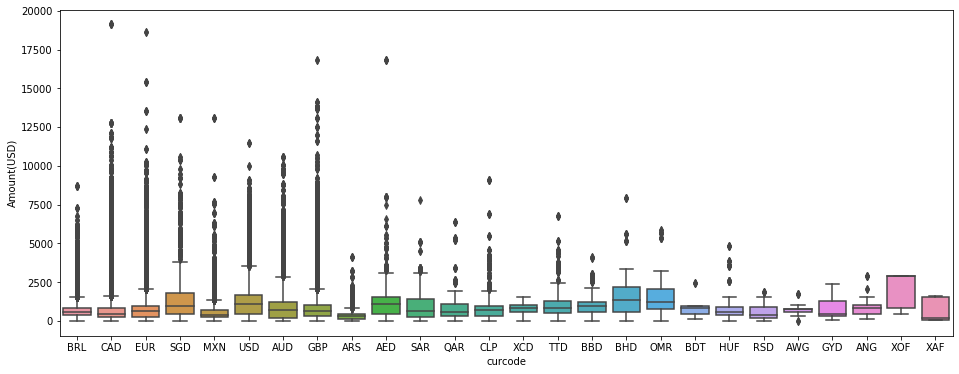

In [9]:
#checking outlier

plt.figure(figsize=(16, 6))
sns.boxplot(data = df1, x = 'curcode', y = 'Amount(USD)')

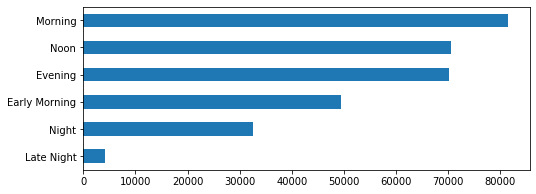

In [10]:
#flight departure time wise 

df1['departure_type'].value_counts().sort_values(ascending = True).plot(kind='barh', figsize = (8,3))

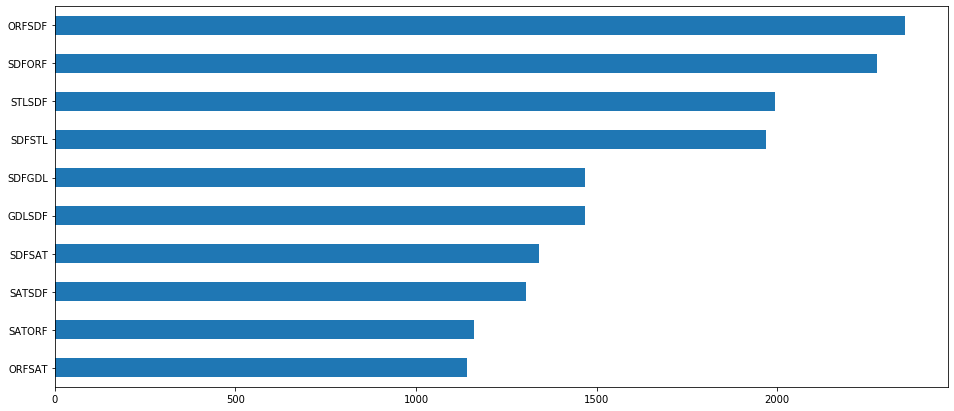

In [15]:
#top 10 busiest route

plt.figure(figsize=(5, 5))
df1['journey_strng'].value_counts()[:10].sort_values(ascending = True).plot(kind='barh', figsize = (16,7))

In [17]:
df2 = df1[['bks24_dais', 'Amount(USD)']]
df2['bks24_dais']=pd.to_datetime(df2['bks24_dais'])

df2['bks24_dais'] = pd.to_datetime(df2['bks24_dais']).dt.to_period('M')

table = pd.pivot_table(df2, values='Amount(USD)', index=['bks24_dais'],aggfunc=np.sum)

df2.set_index('bks24_dais',inplace=True)

C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1152x1152 with 0 Axes>

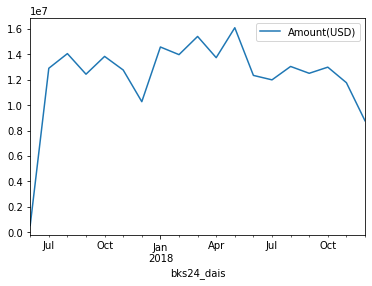

In [20]:
#the timeseries graph shows that the sale is not stattionary  

plt.figure(figsize = (16,16))
table.plot()

In [21]:
#Flight price prediction for flights having one segment
#Filtering dataset
df = df1[df1['n_segments'] == 1]

In [22]:
#checking general descriptive statistics for numerical variables
df.describe()


,airlinecode,bki63_segi,n_tktt,n_segments,label_amount,Amount(USD),booking_travel_days_diff,departure_hour
count,21817.000000,21817.000000,21817.000000,21817.0,21817.000000,21817.000000,21817.000000,21817.000000
mean,11.312600,1.000138,1.007288,1.0,12.811152,244.234189,101.918825,13.339918
std,12.700948,0.011726,0.085059,0.0,544.932008,360.618845,104.858365,4.700779
min,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.0,0.000000,115.378200,15.000000,10.000000
50%,3.000000,1.000000,1.000000,1.0,0.000000,179.186000,58.000000,13.000000
75%,13.000000,1.000000,1.000000,1.0,0.000000,271.334000,175.000000,17.000000
max,48.000000,2.000000,2.000000,1.0,57316.000000,10286.047200,364.000000,23.000000


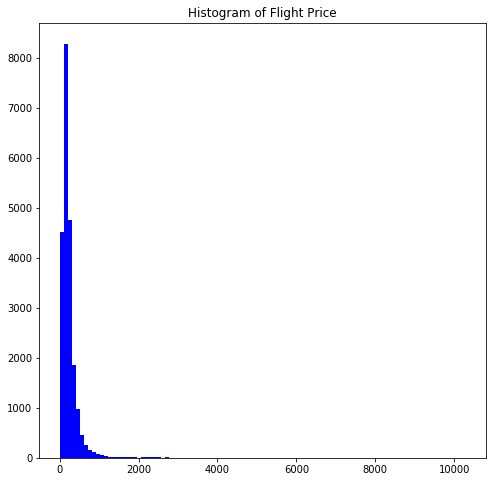

In [23]:
#Create histogram to check the distribution. Its positively skewed data, whicn needs to be converted on logscale.

plt.figure(figsize=(8,8))
plt.hist(df['Amount(USD)'],bins=100,color='b')
plt.title('Histogram of Flight Price')
plt.show()

In [25]:
#converting amount to log scale

df['Amount(USD)'] = np.log(df['Amount(USD)'])

C:\Users\sinha\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\sinha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sinha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


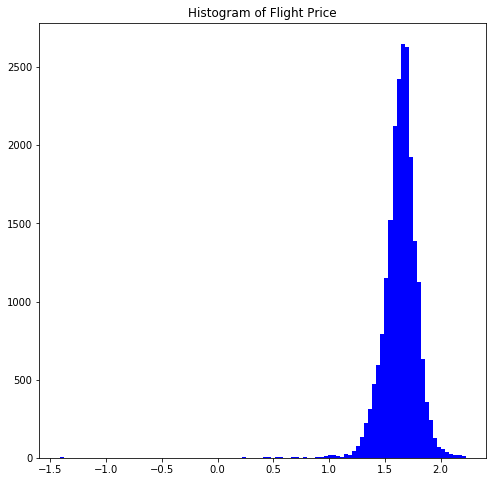

In [26]:
#Now the data is not skewed

plt.figure(figsize=(8,8))
plt.hist(df['Amount(USD)'],bins=100,color='b')
plt.title('Histogram of Flight Price')
plt.show()

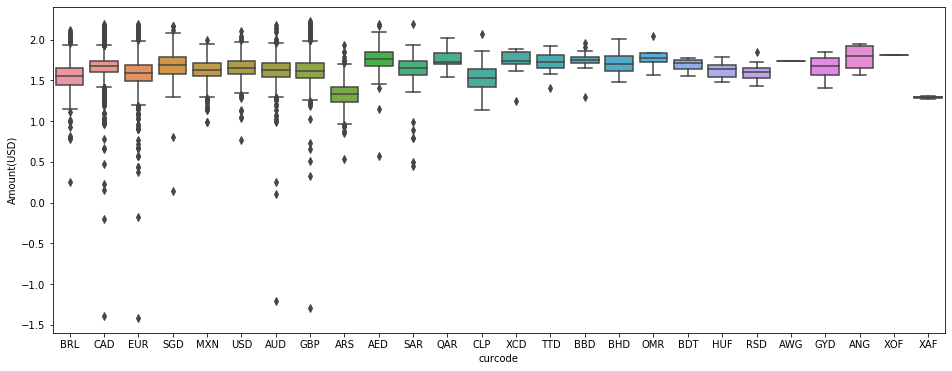

In [27]:
#checking outliers

plt.figure(figsize=(16, 6))
sns.boxplot(data = df, x = 'curcode', y = 'Amount(USD)')

In [28]:
#dropping outlier
q_low = df["Amount(USD)"].quantile(0.03)
q_hi  = df["Amount(USD)"].quantile(0.97)

df_filtered = df[(df["Amount(USD)"] < q_hi) & (df["Amount(USD)"] > q_low)]

In [29]:
#dataframe shape before and after dropping outlier

print(df_filtered.shape)
print(df.shape)

(20035, 25)
(21817, 25)


In [30]:
df_filtered.corr()

#no strong strong correlartion exists

,airlinecode,bki63_segi,n_tktt,n_segments,label_amount,Amount(USD),booking_travel_days_diff,departure_hour
airlinecode,1.000000,-0.004984,-0.008013,NaN,0.023465,-0.184171,0.033096,0.000915
bki63_segi,-0.004984,1.000000,-0.001059,NaN,0.000653,0.012973,-0.006535,0.004509
n_tktt,-0.008013,-0.001059,1.000000,NaN,-0.001300,-0.003004,0.033660,-0.016092
n_segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label_amount,0.023465,0.000653,-0.001300,NaN,1.000000,0.000651,-0.000450,0.014255
Amount(USD),-0.184171,0.012973,-0.003004,NaN,0.000651,1.000000,-0.060323,0.003341
booking_travel_days_diff,0.033096,-0.006535,0.033660,NaN,-0.000450,-0.060323,1.000000,-0.014948
departure_hour,0.000915,0.004509,-0.016092,NaN,0.014255,0.003341,-0.014948,1.000000


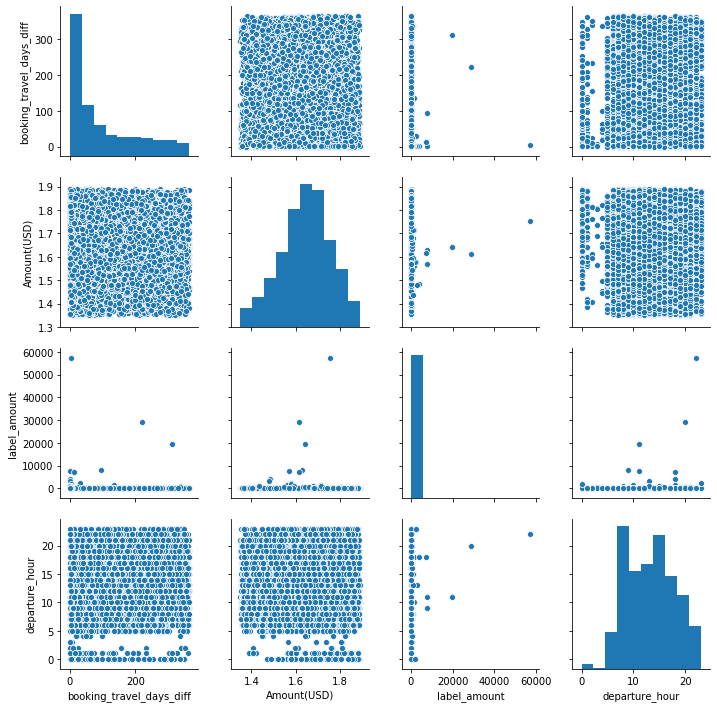

In [31]:
#no strong strong correlartion exists - snspairplot 

pairplot = df_filtered[['booking_travel_days_diff', 'Amount(USD)', 'label_amount', 'departure_hour']]
sns.pairplot(pairplot)

In [32]:
df_filtered.columns

Index(['bks24_pnrr', 'airlinecode', 'curcode', 'bks24_dais', 'bks24_todc',
       'bki63_orac', 'bki63_dstc', 'bki63_carr', 'bki63_ftda', 'bki63_cabi',
       'bki63_rbkd', 'bks39_rdii', 'bki63_segi', 'bki63_stpo', 'bks24_rfic',
       'n_tktt', 'n_segments', 'label', 'label_amount', 'Amount(USD)',
       'booking_travel_days_diff', 'departure_time', 'journey_strng',
       'departure_hour', 'departure_type'],
      dtype='object')

In [33]:
corr = pairplot.corr()
corr

,booking_travel_days_diff,Amount(USD),label_amount,departure_hour
booking_travel_days_diff,1.000000,-0.060323,-0.000450,-0.014948
Amount(USD),-0.060323,1.000000,0.000651,0.003341
label_amount,-0.000450,0.000651,1.000000,0.014255
departure_hour,-0.014948,0.003341,0.014255,1.000000


In [34]:
#extractinf year, day of year from booking and departure date

df_filtered['doj_year']=pd.to_datetime(df_filtered['bki63_ftda']).dt.year
df_filtered['booking_year']=pd.to_datetime(df_filtered['bks24_dais']).dt.year
df_filtered['doj_dayofyear']=pd.to_datetime(df_filtered['bki63_ftda']).dt.dayofyear
df_filtered['booking_dayofyear']=pd.to_datetime(df_filtered['bks24_dais']).dt.dayofyear
df_filtered['year_month_DOJ']=df_filtered['doj_year'].astype(str).str.cat(df_filtered['doj_dayofyear'].astype(str),sep='.').astype(float)
df_filtered['year_month_Booking']=df_filtered['booking_year'].astype(str).str.cat(df_filtered['booking_dayofyear'].astype(str),sep='.').astype(float)


df_model = df_filtered[['airlinecode', 'bks24_todc', 'bki63_cabi', 'bki63_rbkd', 'bks39_rdii', 'bki63_segi', 'bki63_stpo', 'bks24_rfic',
                'n_tktt', 'label', 'label_amount', 'Amount(USD)', 'booking_travel_days_diff', 'journey_strng', 'departure_hour',
                'year_month_DOJ', 'year_month_Booking']]

C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df_model.shape

(20035, 17)

In [39]:
#convert categorical variable to numberical using label encoder

le = preprocessing.LabelEncoder()

df_model['airlinecode_en']=le.fit_transform(df_model['airlinecode'])
df_model['bks24_todc_en']=le.fit_transform(df_model['bks24_todc'])
df_model['bki63_cabi_en']=le.fit_transform(df_model['bki63_cabi'])
df_model['bki63_rbkd_en']=le.fit_transform(df_model['bki63_rbkd'])
df_model['bks39_rdii_en']=le.fit_transform(df_model['bks39_rdii'])
df_model['bki63_stpo_en']=le.fit_transform(df_model['bki63_stpo'])
df_model['bks24_rfic_en']=le.fit_transform(df_model['bks24_rfic'])
df_model['label_en']=le.fit_transform(df_model['label'])
df_model['journey_strng_en']=le.fit_transform(df_model['journey_strng'])

model_data = df_model[['airlinecode_en', 'bks24_todc_en',
                       'bki63_cabi_en', 'bki63_rbkd_en', 'bks39_rdii_en', 
                       'bki63_stpo_en', 'bki63_segi', 'n_tktt', 'label_amount', 
                       'Amount(USD)', 'booking_travel_days_diff', 'bks24_rfic_en', 'label_en', 'journey_strng_en',
                       'departure_hour', 'year_month_DOJ', 'year_month_Booking']]

C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [41]:
#defining x and y variables

x_var = ['airlinecode_en', 'bks24_todc_en',
    'bki63_cabi_en', 'bki63_rbkd_en', 'bks39_rdii_en', 
    'bki63_stpo_en', 'bki63_segi', 'n_tktt', 'label_amount', 
    'booking_travel_days_diff', 'bks24_rfic_en', 'label_en', 'journey_strng_en',
    'departure_hour', 'year_month_DOJ', 'year_month_Booking']

X = model_data[x_var]
y = model_data['Amount(USD)']
    

In [42]:
#test and train split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

X_train.shape

(14024, 16)

In [43]:
#fetaure standardization using standard scaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

train = pd.concat([X_train_scaled, y_train], axis=1)
test = pd.concat([X_test_scaled, y_test], axis=1)

In [44]:
train.shape

(14024, 17)

In [45]:
#defining function to calculate RMSE 

def RMSE(estimator,X_train, Y_train, cv,n_jobs=-1):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [70]:
#creating model

def baseModels(train_X,train_y):
    model_EN=ElasticNet(random_state=0)
    model_SVR=svm.SVR(kernel='rbf',C=0.005)
    model_Lasso=Lasso(alpha=0.1,max_iter=1000)
    model_Ridge=Ridge(alpha=0.1)
    model_Linear=LinearRegression()
    model_XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.02, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=4)
    model_DTR = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
    model_RFR=RandomForestRegressor(n_jobs=-1)
    model_KNN=neighbors.KNeighborsRegressor(3,weights='uniform')
    model_Bayesian=BayesianRidge()
    model_adaboost=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    kf = KFold(n_splits=5, random_state=None, shuffle=True)

    models={'ElasticNet':model_EN,'SVR':model_SVR,'Lasso':model_Lasso,'Ridge':model_Ridge,
            'XGB':model_XGB,'DTR':model_DTR,'RandomForest':model_RFR,'KNN':model_KNN,
            'Bayes':model_Bayesian,'Linear':model_Linear,'AdaBoost':model_adaboost}

    rmse=[]
    for model in models.values():

        rmse.append(RMSE(model,train_X,train_y,kf))                         
    dataz = pd.DataFrame(data={'RMSE':rmse},index=models.keys())
    return  dataz

In [71]:
#Random Forest gives least RMSE, so will proceed with Random Forest hyperparamter tuning

baseModels(X_train,y_train)

,RMSE
ElasticNet,0.110874
SVR,0.110769
Lasso,0.109799
Ridge,0.107398
XGB,0.178777
DTR,0.099061
RandomForest,0.077917
KNN,0.109838
Bayes,0.107424
Linear,0.107357


In [48]:
model_rf=RandomForestRegressor(n_jobs=-1)
RMSE(model_rf,X,y,10)

0.0765305669579961

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_scaled, y_train)

In [50]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train_scaled, y_train)
print(random_forest.score(X_train_scaled, y_train))

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_forest.get_params())


0.9348882152756771
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [51]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

forest = RandomForestRegressor(n_jobs=-1)

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.8s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [53]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.10829029273589415 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.10829468215157251 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.08212683927420768 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.07829252577204598 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.10840597296495168 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.08087892584994526 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.08105089088510571 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.07720009050665651 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.10843274348759387 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.08161234001350764 {'n_estimators': 110,

In [54]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=155, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

In [56]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=155, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:

# extract the numerical values of feature importance from the grid search search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

print(df)

    importance                   feature
0     0.322397             bki63_rbkd_en
1     0.200026            airlinecode_en
2     0.081924             bks24_todc_en
3     0.078602          journey_strng_en
4     0.077108  booking_travel_days_diff
5     0.074594        year_month_Booking
6     0.067965            year_month_DOJ
7     0.053744            departure_hour
8     0.016189              label_amount
9     0.012649             bks39_rdii_en
10    0.006746                  label_en
11    0.006173             bks24_rfic_en
12    0.000970                    n_tktt
13    0.000815             bki63_cabi_en
14    0.000071                bki63_segi
15    0.000025             bki63_stpo_en


<Figure size 720x720 with 0 Axes>

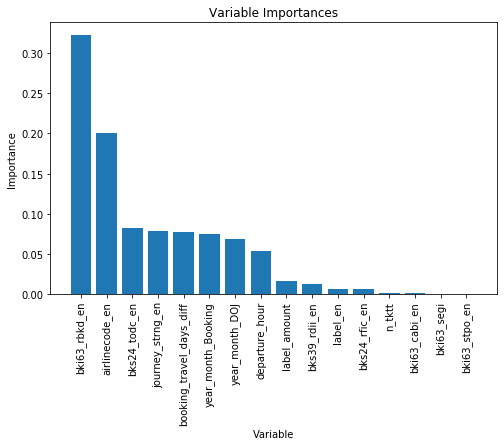

In [60]:
plt.figure(figsize = (10,10))
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(8,5))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0.5, 0, 'Tree depth')

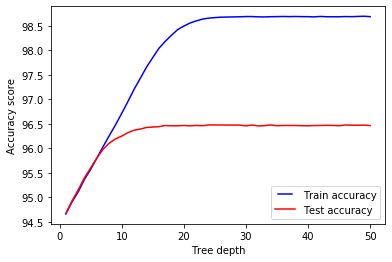

In [63]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(X_train_scaled, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(X_train_scaled)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
     #now again for test data
    housing_tree = dt.predict(X_test_scaled)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')


##The Test- train accuracy graph splits at 9, so will have 8 features in the model, based on importance

#The train graph becomes flat at tree depth of ~21. So, will have max_depth as 21.


In [57]:
random_best= rf_random.best_estimator_.predict(X_train_scaled)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 97.95 %


In [58]:
#this is the RMSE

from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.04


In [61]:
# Evaluate best model on the test set

final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.08


In [62]:
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 96.46 %
